# Experimenting with making movies

Roland and I were exploring some ways of making animations from plots in python.  Both of the methods below require ffmpeg, which we installed following this guide:
https://www.wikihow.com/Install-FFmpeg-on-Windows


 ## Method 1: using matplotlib.animation.FuncAnimation
 
 This could work fine, but I didn't totally figure it out.  An advantage is that it doesn't require generating a bunch of still frame images.

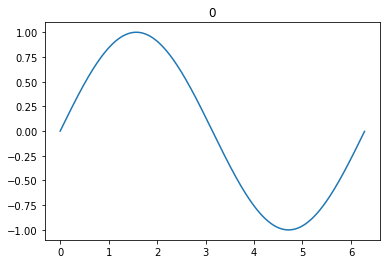

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    plt.title(str(i))
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)


plt.show()

In [4]:
pwd

'/Users/lfp/Documents/GitHub/satellite_python_2022V2/notebooks'

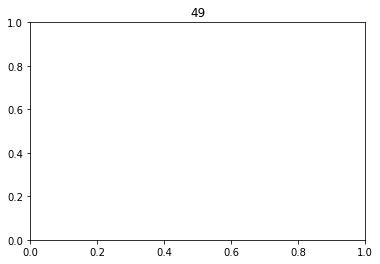

In [3]:
# To save the animation, use e.g.
#
#ani.save("movie.mp4")
#
# or
#
writer = animation.FFMpegWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)


## Method 2: Generate still images and weave them together with a command-line call to ffmpeg

This seems like a fine solution.

In [17]:
__figdir__ = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/plots/plots3/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 700
plt.close('all')


In [18]:
__figdir__ 

'/Users/lfp/Documents/GitHub/satellite_python_2022V2/plots/plots3/'

KeyboardInterrupt: 

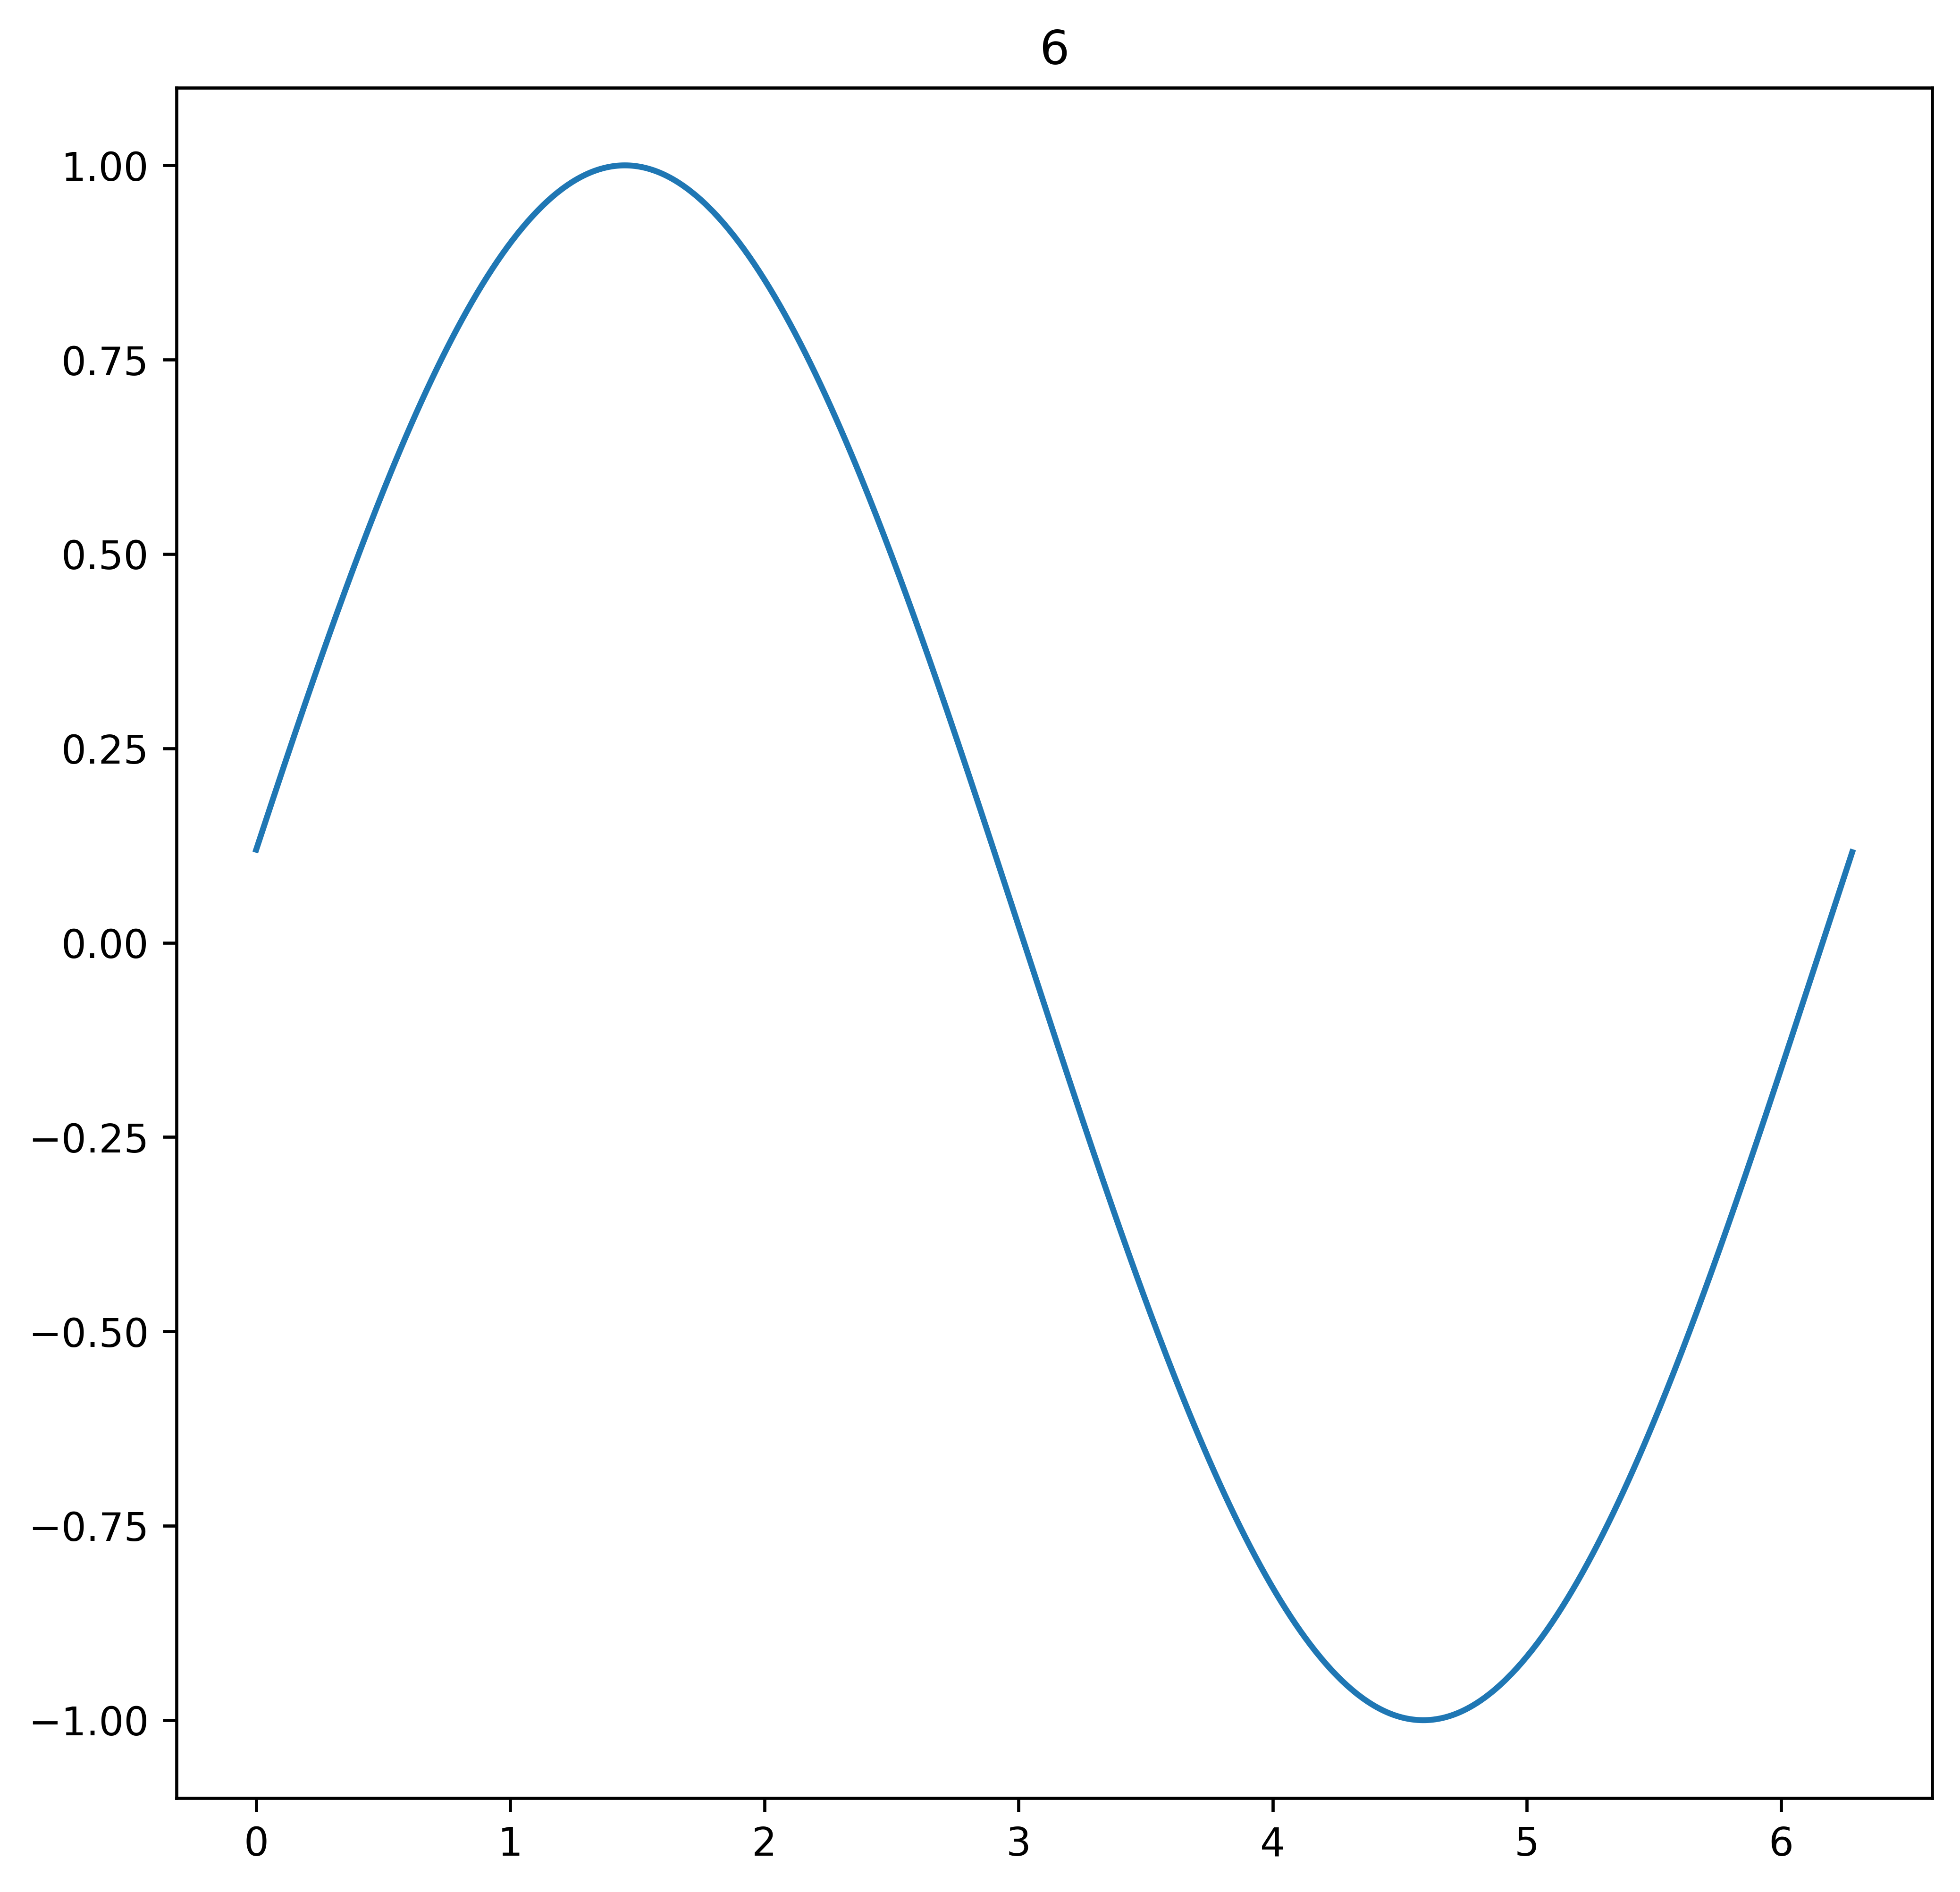

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


for i in range(100):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    plt.title(str(i))
    plt.savefig(__figdir__+'img'+ str(i) + '.' +plotfiletype,**savefig_args)



In [4]:
cd satellite_python_2022/notebooks

[WinError 3] The system cannot find the path specified: 'satellite_python_2022/notebooks'
C:\Users\jtomf\Documents\Python\satellite_python_2022\notebooks


In [15]:
pwd

'/Users/lfp/Documents/GitHub/satellite_python_2022V2/plots/plots3'

In [13]:
cd $__figdir__

/Users/lfp/Documents/GitHub/satellite_python_2022V2/plots/plots3


In [20]:
#!ffmpeg -r 5 -i img%d.png video4.avi
!ffmpeg -framerate 3 -r 3 -i img%d.png -s 1920x1080 -r 5 video5.avi

# Roland did it this way:
# !ffmpeg -framerate 1 -r 2 -f image2 -s 1920x1080 -i SST_Plot2020_%d.png test2.mp4

ffmpeg version N-105691-gc439c6b191-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static